# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
#LOAD PICKLED DATA 
from tensorflow.examples.tutorials.mnist import input_data
from skimage import color
import numpy as np

#mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)


In [2]:
#Set local variables
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
#read in the signnames
import csv
with open( 'signnames.csv', 'rt') as f:
    reader = csv.reader(f)
    label_name = list(reader)
    #print(len(label_name))
final_label_name=label_name[1:]
#print(len(final_label_name))

In [4]:
#for key,value in train.items():
    #print(key)
    #print(train[key].shape)

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
unique, counts = np.unique(y_train, return_counts=True)
unique_val, counts_val = np.unique(y_validation, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
n_classes=len(unique)
n_classes_val=len(unique_val)
n_classes_test=len(unique_test)

#print(unique,counts)
#print(y_train.shape)
#print(unique[0])
#unique_0=np.where(y_train==unique[0])[0]
#print(unique_0[0:5])
#print(np.where(y_train==unique[0])[0])
#print("Number of training examples =", n_train)
#print("Number of testing examples =", n_test)
#print("Image data shape =", image_shape)
#print("Number of classes =", n_classes)

['0', 'Speed limit (20km/h)']


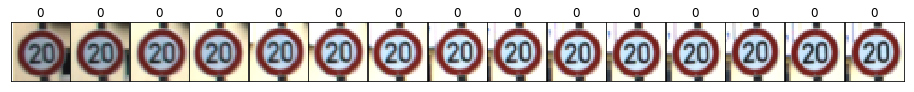

['1', 'Speed limit (30km/h)']


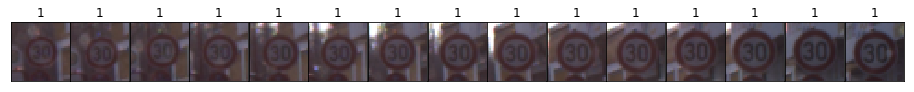

['2', 'Speed limit (50km/h)']


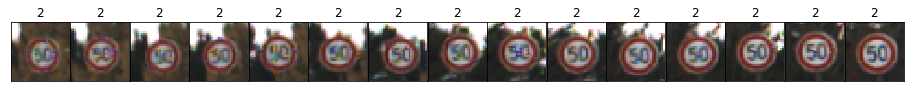

['3', 'Speed limit (60km/h)']


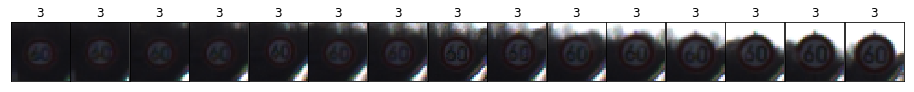

['4', 'Speed limit (70km/h)']


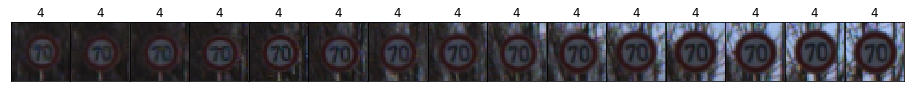

['5', 'Speed limit (80km/h)']


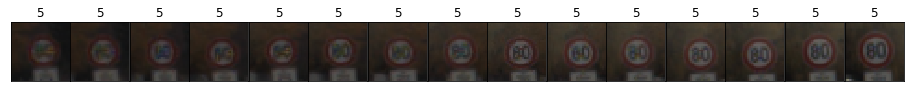

['6', 'End of speed limit (80km/h)']


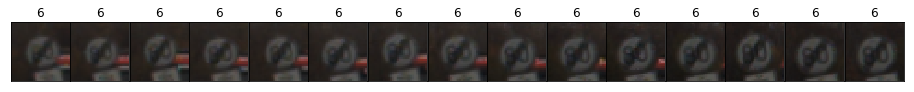

['7', 'Speed limit (100km/h)']


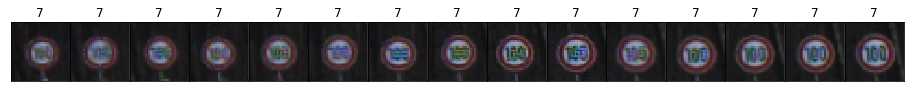

['8', 'Speed limit (120km/h)']


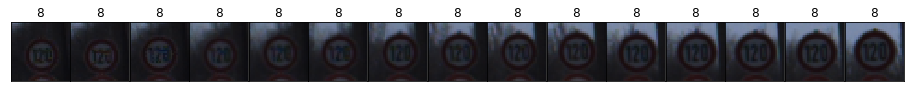

['9', 'No passing']


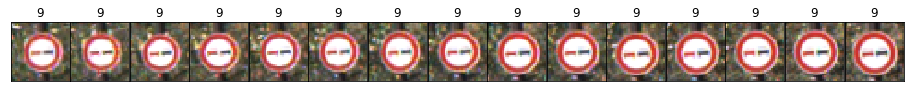

['10', 'No passing for vehicles over 3.5 metric tons']


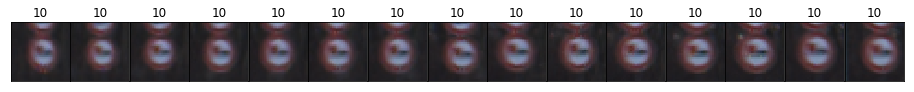

['11', 'Right-of-way at the next intersection']


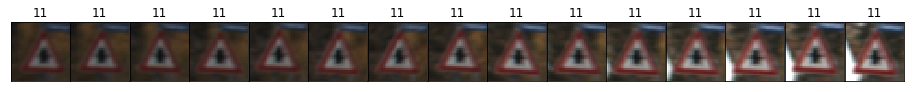

['12', 'Priority road']


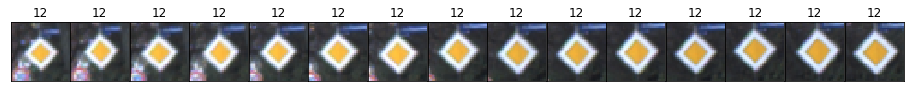

['13', 'Yield']


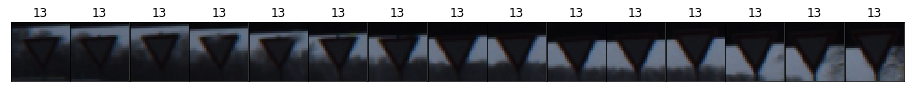

['14', 'Stop']


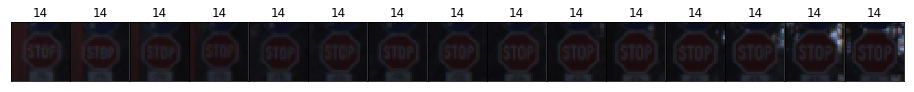

['15', 'No vehicles']


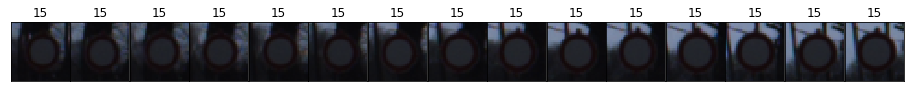

['16', 'Vehicles over 3.5 metric tons prohibited']


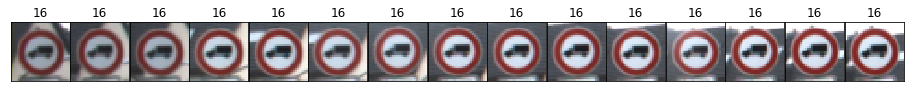

['17', 'No entry']


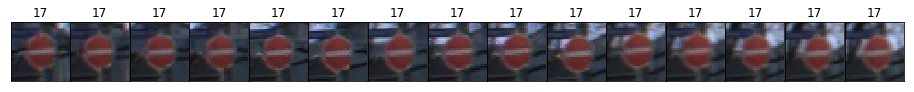

['18', 'General caution']


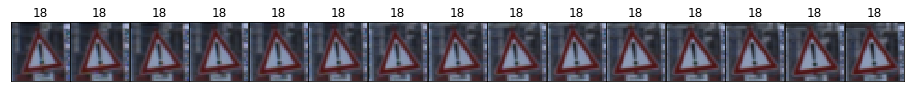

['19', 'Dangerous curve to the left']


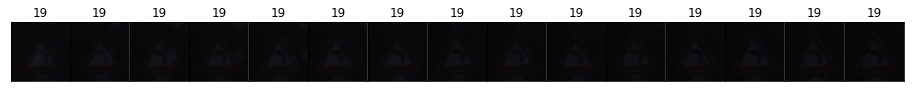

['20', 'Dangerous curve to the right']


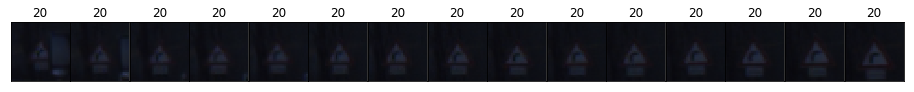

['21', 'Double curve']


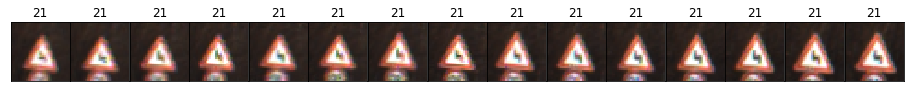

['22', 'Bumpy road']


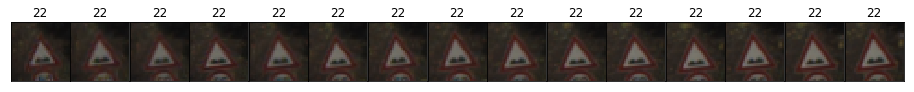

['23', 'Slippery road']


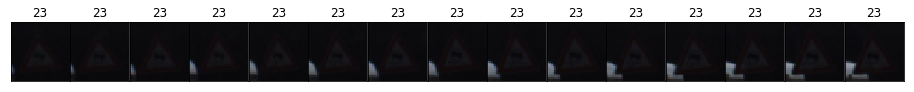

['24', 'Road narrows on the right']


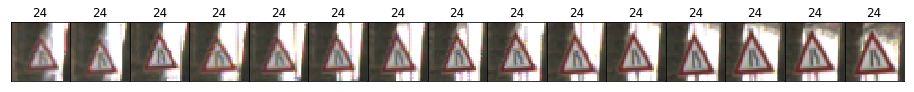

['25', 'Road work']


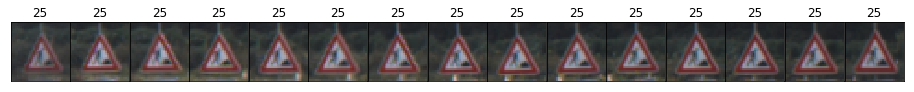

['26', 'Traffic signals']


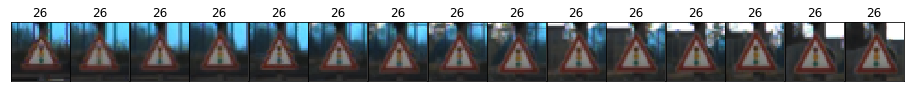

['27', 'Pedestrians']


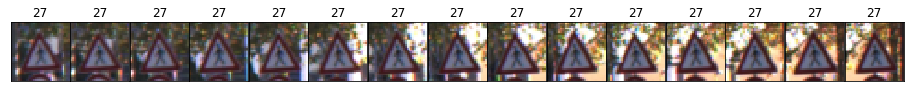

['28', 'Children crossing']


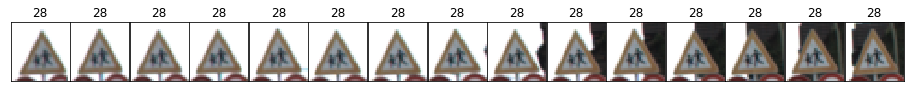

['29', 'Bicycles crossing']


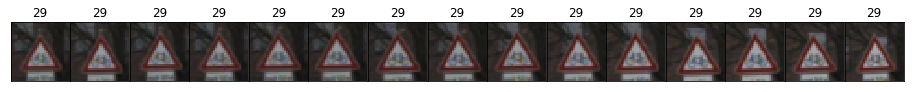

['30', 'Beware of ice/snow']


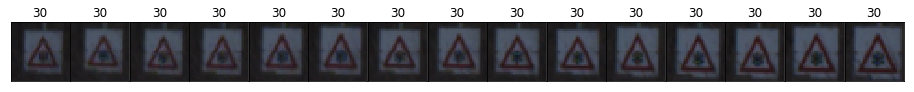

['31', 'Wild animals crossing']


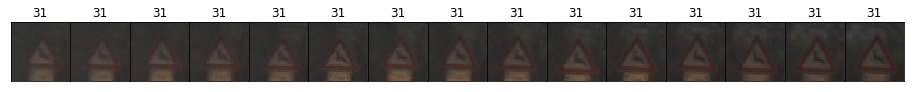

['32', 'End of all speed and passing limits']


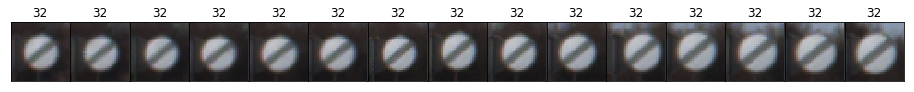

['33', 'Turn right ahead']


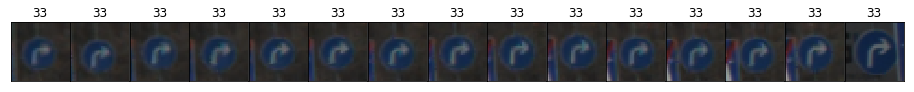

['34', 'Turn left ahead']


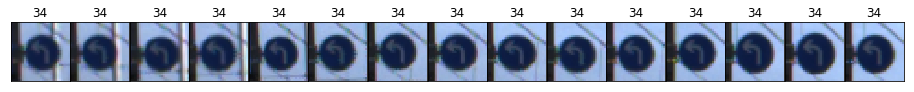

['35', 'Ahead only']


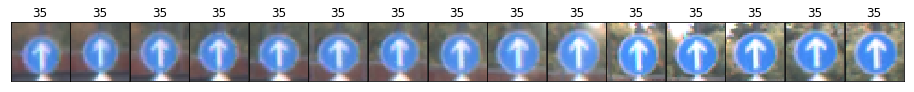

['36', 'Go straight or right']


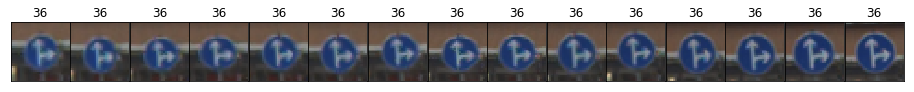

['37', 'Go straight or left']


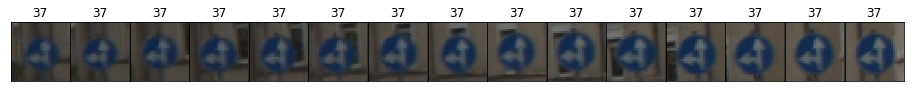

['38', 'Keep right']


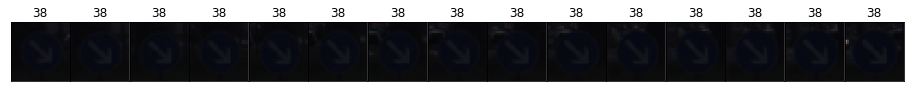

['39', 'Keep left']


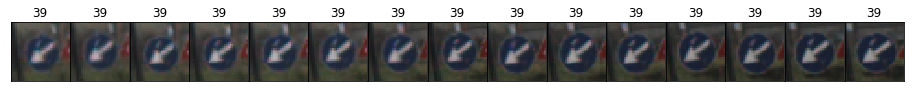

['40', 'Roundabout mandatory']


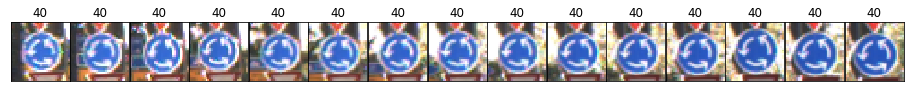

['41', 'End of no passing']


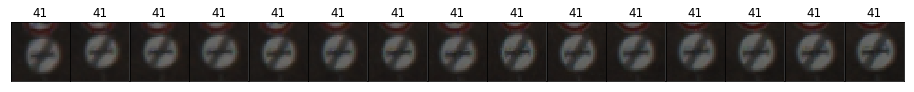

['42', 'End of no passing by vehicles over 3.5 metric tons']


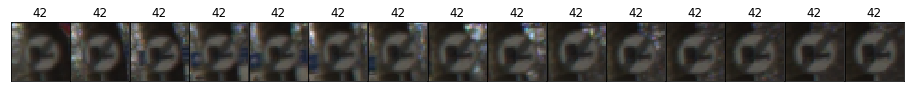

In [5]:
# VISUALIZATION OF TRAFFIC SIGNS
import matplotlib.pyplot as plt
import numpy as np

no_images_displayed_per_class=15

%matplotlib inline
for unique_classes in unique:
    class_images=np.where(y_train==unique_classes)[0][0:no_images_displayed_per_class]
    np.random.seed(4)
    #grid = np.random.rand(4, 4)
    print(final_label_name[unique_classes])
    fig, axes = plt.subplots(1, no_images_displayed_per_class, figsize=(16,18),
                             subplot_kw={'xticks': [], 'yticks': []})

    fig.subplots_adjust(hspace=0.1, wspace=0.01)
    
    for ax, class_image in zip(axes.flat, class_images):
        #print(X_train[class_image][0][0])
        #print(class_image)
        ax.imshow(X_train[class_image].squeeze())
        #Use for grayscale images
        #ax.imshow(X_train[class_image].squeeze(),cmap='gray')
        ax.set_title(y_train[class_image])

    plt.show()

In [6]:
#CONVERT ALL IMAGES TO GRAYSCALE
#X_train=color.rgb2gray(X_train)
#X_validation=color.rgb2gray(X_validation)
#X_test=color.rgb2gray(X_test)
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_validation = np.sum(X_validation/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)

In [7]:
#NORMALIZE THE DATA
X_train= (X_train-128)/128
X_validation=(X_validation-128)/128
X_test=(X_test-128)/128


#X_train, y_train           = mnist.train.images, mnist.train.labels
#X_validation, y_validation = mnist.validation.images, mnist.validation.labels
#X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

#print(X_train.shape)

#print("Image Shape: {}".format(X_train[0].shape))
#print()
#print("Training Set:   {} samples".format(len(X_train)))
#print("Validation Set: {} samples".format(len(X_validation)))
#print("Test Set:       {} samples".format(len(X_test)))

In [8]:
more_samples_required=max(counts)-counts
print('Equalize each class sample count to max samples present in original data set')
print('Total data size increase by', sum(more_samples_required)/sum(counts)*100, '%')
#print(np.median(counts))
#more_samples_required=max(counts)-counts
#for u,samples in zip(unique,more_samples_required):
#    print(u,samples)
#print(sum(more_samples_required), sum(counts))

Equalize each class sample count to max samples present in original data set
Total data size increase by 148.369206012 %


In [9]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import numpy as np
#X_train_mod=[]
#y_train_mod=[]

#X_train_mod=np.concatenate((X_train_mod, X_train[0]), axis=0)
#X_train_mod.append(X_train[0])
#X_train_mod=np.array(X_train_mod)
#print(X_train_mod.shape)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X_train_mod=X_train
y_train_mod=y_train
print(X_train.shape,y_train.shape)
for unique_class_label,no_of_more_samples in zip(unique,more_samples_required):
        class_images=np.where(y_train==unique_class_label)
        #print('No of samples',no_of_more_samples)
        if(no_of_more_samples>0):
            RAND_IMAGES=np.random.choice(class_images[0], no_of_more_samples, replace=True)
            #print('No of samples',no_of_more_samples,RAND_IMAGES.shape)
            #X_train_mod=X_train_mod.append(RAND_IMAGES)
            X_train_mod=np.concatenate((X_train_mod, X_train[RAND_IMAGES]), axis=0)
            y_train_mod=np.concatenate((y_train_mod, np.repeat(unique_class_label,no_of_more_samples)), axis=0)
print(X_train_mod.shape,y_train_mod.shape)


(34799, 32, 32, 1) (34799,)
(86430, 32, 32, 1) (86430,)


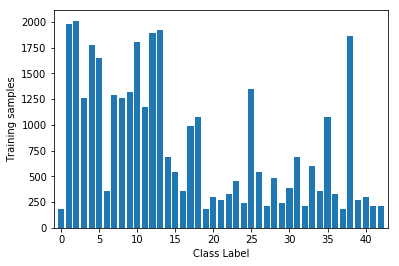

In [11]:
# VISUALIZATION OF TRAFFIC SIGNS before augmenting data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.bar( np.arange( n_classes ), counts, align='center' )
plt.xlabel('Class Label')
plt.ylabel('Training samples')
plt.xlim([-1, n_classes])
plt.show()

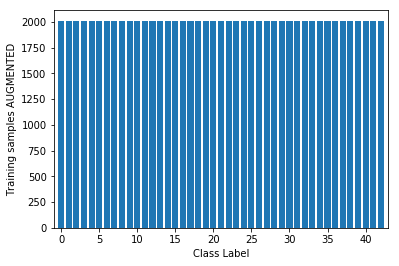

In [12]:
# VISUALIZATION OF TRAFFIC SIGNS AFTER augmenting data

unique_mod, counts_mod = np.unique(y_train_mod, return_counts=True)
plt.bar( np.arange( n_classes ), counts_mod, align='center' )
plt.xlabel('Class Label')
plt.ylabel('Training samples AUGMENTED')
plt.xlim([-1, n_classes])
plt.show()

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [13]:
#SET TRAINING VARIABLES WITH AUGMENTED DATA
X_train=X_train_mod
y_train=y_train_mod

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#NOT REQUIRED, TRAFFIC SIGNS DATASET IS ALREADY 32X32 

#import numpy as np

# Pad images with 0s
#X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
#X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
#X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
#print("Updated Image Shape: {}".format(X_train[0].shape))

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

24


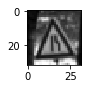

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
#plt.imshow(image)
#Use for grayscale
plt.imshow(image,cmap='gray')
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [17]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [18]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 160
KEEP_PROB     = 0.5

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [19]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
     
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3 [TRAFFIC SIGN DATA SET HAS 3 CHANNELS,BUT THIS GOT CONVERTED TO GRAYSCALE]. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    #IF USING RGB IMAGES, USE THIS INSTEAD WITH INPUT MATRIX CHANNELS SET TO 3
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    #DROPOUT
    #conv1=tf.nn.dropout(conv1, keep_prob=KEEP_PROB)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv1 = tf.nn.dropout(conv1, keep_prob=KEEP_PROB)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2=tf.nn.dropout(conv2, keep_prob=KEEP_PROB)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv2 = tf.nn.dropout(conv2, keep_prob=KEEP_PROB)

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    #fc0=tf.nn.dropout(fc0, keep_prob=KEEP_PROB)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    #fc1=tf.nn.dropout(fc1, keep_prob=KEEP_PROB)

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    #fc1=tf.nn.dropout(fc1, keep_prob=KEEP_PROB)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2=tf.nn.dropout(fc2, keep_prob=KEEP_PROB)


    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43[TRAFFIC SIGN DATA HAS 43 OUTPUT CLASSES].
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32,1))
#IF USING RGB IMAGES, USE THIS INSTEAD WITH INPUT MATRIX CHANNELS SET TO 3
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))

y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [21]:
#rate = 0.001
rate=0.00097

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    #The np.newaxis adds a new dimension of size 1 in the  last (channels) dimensions, as the tensorflow 2D convolution expects 4D array, and we converted RGB channel to grayscale and lost 1 dimension
    #X_validation = X_validation[..., np.newaxis]  
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #The np.newaxis adds a new dimension of size 1 in the  last (channels) dimensions, as the tensorflow 2D convolution expects 4D array
            #batch_x = batch_x[..., np.newaxis]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
          
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if (validation_accuracy>0.93):
            break
        
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.797

EPOCH 2 ...
Validation Accuracy = 0.846

EPOCH 3 ...
Validation Accuracy = 0.869

EPOCH 4 ...
Validation Accuracy = 0.864

EPOCH 5 ...
Validation Accuracy = 0.873

EPOCH 6 ...
Validation Accuracy = 0.881

EPOCH 7 ...
Validation Accuracy = 0.892

EPOCH 8 ...
Validation Accuracy = 0.902

EPOCH 9 ...
Validation Accuracy = 0.886

EPOCH 10 ...
Validation Accuracy = 0.890

EPOCH 11 ...
Validation Accuracy = 0.912

EPOCH 12 ...
Validation Accuracy = 0.907

EPOCH 13 ...
Validation Accuracy = 0.889

EPOCH 14 ...
Validation Accuracy = 0.900

EPOCH 15 ...
Validation Accuracy = 0.910

EPOCH 16 ...
Validation Accuracy = 0.912

EPOCH 17 ...
Validation Accuracy = 0.919

EPOCH 18 ...
Validation Accuracy = 0.914

EPOCH 19 ...
Validation Accuracy = 0.921

EPOCH 20 ...
Validation Accuracy = 0.905

EPOCH 21 ...
Validation Accuracy = 0.919

EPOCH 22 ...
Validation Accuracy = 0.933

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [25]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.912


['./web-images/4.png', './web-images/3.png', './web-images/1.png', './web-images/6.png', './web-images/5.png']
(5, 32, 32, 3)


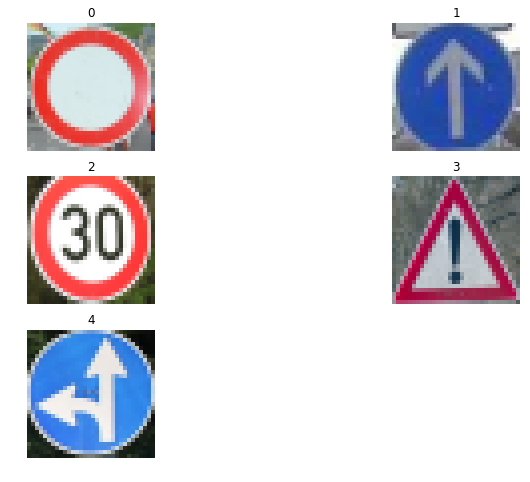

In [53]:
import glob
import cv2

num_of_samples=[]
#Import test images  
test_img_paths = [img_path for img_path in glob.glob("./web-images/*")]
print(test_img_paths)
test_img=np.uint8(np.zeros((5,32,32,3)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    test_img[i]=img

print(test_img.shape)
#Visualize new raw images
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.imshow(test_img[i]) 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

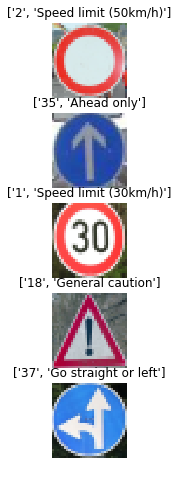

In [54]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def test_net(X_data, sess):
    pred_sign = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data})
    return pred_sign

#X_test_data=np.uint8(np.zeros((5,32,32,3)))
X_test_web = np.sum(test_img/3, axis=3, keepdims=True)
X_test_web=X_test_web.astype(np.float32)
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs_classes=test_net(X_test_web, sess)


plt.figure(figsize=(12, 8))
for i in range(5):
    #print(final_label_name[i])
    plt.subplot(5,1, i+1)
    plt.imshow(test_img[i]) 
    plt.title(final_label_name[signs_classes[i]])
    plt.axis('off')
plt.show()

In [57]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def test_net(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data})
    print(prob)
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)


with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs_top_5=test_net(X_test_web, sess)
    #print(X_test_web)

[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.]]


In [56]:
print(signs_top_5)

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[ 2,  0,  1,  3,  4],
       [35,  0,  1,  2,  3],
       [ 1,  0,  2,  3,  4],
       [18,  0,  1,  2,  3],
       [37,  0,  1,  2,  3]], dtype=int32))
